## Imports and functions

In [1]:
import sklearn
print(sklearn.__version__)

0.22.1


In [2]:
!python -m pip install featuretools;

In [3]:
!pip install autopep8
!pip install yapf

In [4]:
!pip install scikit-image
!pip install tifffile
!pip install --upgrade Cython

Requirement already up-to-date: Cython in c:\users\samuel\miniconda3\lib\site-packages (0.29.15)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Samuel\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
def plot_image(vec):
    plt.figure(figsize=(20, 5))
    plt.imshow(vec, cmap="Greys")
    plt.axis('off')
    plt.show()

# Data Preprocessing

### What is preprocessing?
`Preprocessing is the name given to methods that change the raw features (data) into a representation more suitable for ML models and DL networks furthre down the pipeline. As such there is a lot of overlap between preprocessing and feature extraction/engineering, with some methods being put in the former category by some and the latter by others.`

### Why do we need to preprocess?

`Real world data is generally:`

- `Incomplete: Missing attribute values, missing certain attributes of importance, or having only aggregate data`
- `Noisy: Containing errors or outliers`
- `Inconsistent: Containing discrepancies in codes or names`

`In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate.`

## Standardization

`Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.`



### StandardScaler

`The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.`

In [7]:
from sklearn import preprocessing
import numpy as np

X_train = np.array([[1., -6.,  2.],
                    [2.,  8.,  0.],
                    [0.,  2., -1.]])

scaler = preprocessing.StandardScaler().fit(X_train)

In [8]:
print("Scaler mean:\n", scaler.mean_, "\n")
print("Scaler scale:\n", scaler.scale_, "\n")
X_train_scaled = scaler.transform(X_train)
print("Scaled data:\n", X_train_scaled)

Scaler mean:
 [1.         1.33333333 0.33333333] 

Scaler scale:
 [0.81649658 5.73488351 1.24721913] 

Scaled data:
 [[ 0.         -1.27872403  1.33630621]
 [ 1.22474487  1.16247639 -0.26726124]
 [-1.22474487  0.11624764 -1.06904497]]


`Scaled data has zero mean and unit variance:`

In [9]:
np.mean(X_train_scaled, axis=0)
np.std(X_train_scaled, axis=0)

array([1., 1., 1.])

`The scaler instance can then be used on new data to transform it the same way it did on the training set:`

In [10]:
X_test = [[-1., 1., 0.]]
scaler.transform(X_test)

array([[-2.44948974, -0.05812382, -0.26726124]])

### Other Scalers

#### Scaling for a range

`An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.`

`The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.`

####  Scaling data with outliers

`If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use RobustScaler as drop-in replacements instead. Its uses more robust estimates for the center and range of your data.`

#### Scaling sparse data

`Centering sparse data would destroy the sparseness structure in the data, and thus rarely is a sensible thing to do. However, it can make sense to scale sparse inputs, especially if features are on different scales.`

`MaxAbsScaler is specifically designed for scaling sparse data, and is the recommended way to go about this. However StandardScaler can accept scipy.sparse matrices as input, as long as with_mean=False is explicitly passed to the constructor`

[`Compare the effect of different scalers on data with outliers`](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

## Normalization

`The normalization of data is the transformation that results in a variance of 1, StandardScaler accomplishes this however there is also sklearn.preprocessing.Normalizer, this normalizes samples individually to unit norm.`

`Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one.`

In [11]:
from sklearn.preprocessing import Normalizer
X = np.array([[4, 1, 2, 2], [1, 3, 9, 3], [5, 7, 5, 1]])
transformer = Normalizer().fit(X)  # fit does nothing.

Y = transformer.transform(X)

In [12]:
Y

array([[0.8, 0.2, 0.4, 0.4],
       [0.1, 0.3, 0.9, 0.3],
       [0.5, 0.7, 0.5, 0.1]])

In [13]:
np.linalg.norm(Y, axis=1)

array([1., 1., 1.])

## Imputation of missing values

`For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.`

### Univariate imputers

`Univariate imputers only uses non-missing data from the dimension of data with missing values. The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.`

`In the following code snippet np.nan is used as the missing values although this could be replaced with anything, similarly the strategy variable in the Imputer object can take any of the following values:`
- `constant (then replace missing values with fill_value=...)`
- `most_frequent`
- `median`
- `mean`


In [14]:
import numpy as np
from sklearn.impute import SimpleImputer
X = [[1, 2], [np.nan, 3], [7, 6]]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [15]:
Y = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(Y))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


`This can be thought of as similar to scaling or vectorising, the best practise is to fit_transform the tranin data and then transform the test data.`

### Multivariate imputers


`Multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).`

`It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y.` 

`This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.`

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)

X_train = np.array([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
print(X_train)

[[ 1.  2.]
 [ 3.  6.]
 [ 4.  8.]
 [nan  3.]
 [ 7. nan]]


In [17]:
imp.fit(X_train)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [18]:
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


# Feature Engineering/Extraction

### What is a feature?

`In machine learning and pattern recognition, a feature is an individual measurable property or characteristic of a phenomenon being observed. Features are usually numeric, but structural features such as strings can be used in NLP tasks.` 

`The concept of "feature" is related to that of predictor variable used in statistical techniques such as linear regression, for example height and or weight in a BMI prediction model.`

### What is feature engineering

`Feature engineering is the process of using domain knowledge or vectorization techniques to extract features from raw data. These features can be used to improve the performance of machine learning algorithms. Feature engineering also includes selecting and discarding features based on their importance, this is something that is commonly automated (Feature Selection).`

## Vectorization

### What is a vector in the context of machine learning?

`Vectors are a foundational element of linear algebra. Vectors are used throughout the field of machine learning in the description of algorithms and processes, for example in the following dataframe X is a vector with dimensions 4xn, y is also a vector with dimensions 1xn, where n is the number of rows in the dataframe.`

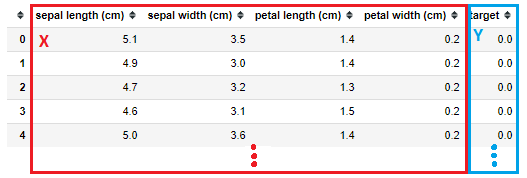

### What is vectorization?

`Vectorisation is the name given to any process that involves converting non numeric features into vectors, this encompasses:`

- `Categorical data (e.g OneHotEncoder or LabelEncoder)`
- `Text (e.g TfidfVecotrizer or Word2Vec)`
- `Images (e.g Using the pixel values)`

### Categorical Encoding

#### LabelEncoder

`Encodes target labels with values between 0 and n_classes-1. This transformer should be used to encode target values, i.e. y, and not the input X.`

In [19]:
from sklearn import preprocessing

# The encoder object is instantiated
le = preprocessing.LabelEncoder()
# It is then fitted to a list of categorical data
le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [20]:
# The encoder object stores the classes
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [21]:
# As a result it can be used to transform a list of 'known' data into numerical
# form, if there is an entry unknown the the encoder it will throw an error
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1], dtype=int64)

In [22]:
# For testing, presentation, or deployment purposes the object can also reverse
# the encoding
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

`The le object could also be applied directly to the inital data using the fit_transform method, this is what will typically be done on the columns in the dataframe that you wish to vectorise`

#### OneHotEncoder

`Encode categorical features as a one-hot numeric array. The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse parameter).`

`Unlike Label encoder this method is frequently used on the input (X).`

In [23]:
from sklearn import preprocessing

# Define example categorical data
data = np.array(['cold', 'cold', 'warm', 'cold', 'hot'])
print(data)

['cold' 'cold' 'warm' 'cold' 'hot']


In [24]:
# Instantiate the OHE object
Oh = preprocessing.OneHotEncoder(sparse=False)
# And then fit it to the categorical data
Oh.fit(data.reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [25]:
# As before the object stores the categories
print(Oh.categories_)

[array(['cold', 'hot', 'warm'], dtype='<U4')]


In [26]:
test_data = np.array(["warm", "hot", "warm", "cold"])
Oh.transform(test_data.reshape(-1, 1))

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

`The OHE object could also be applied directly to the inital data using the fit_transform method, this is what will typically be done on the columns in the dataframe that you wish to vectorise`

#### When to use which?

`In essence LabelEncoder is for ordinal data, while OneHotEncoder is for nominal data, LE for Tree-based models, but OHE for everything else.`

`Algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.`

`One-Hot-Encoding has the advantage that the result is binary rather than ordinal. The disadvantage is that for high cardinality (number of categories), the feature space can grow very quickly althougth a 'classic' combination is to use OHE followed by PCA to reduce the dimensionality.`

### Text Vectorization

#### Basic Text Vectorization methods 

`One of the simplest methods of encoding text data is by word counts: you take each snippet of text, count the occurrences of each word within it, and put the results in a vector, this vector is the vector representation of that piece of text.`

`For example, consider the following set of three phrases:`

In [27]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the vectorizer object
vec = CountVectorizer()

# Fit and transform the sample data into it's vector representation
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

`The resulting sparse (mostly zeroes) matrix can be displayed by converting it into a dataframe although when using vector representations of text in ML models it is very beneficial for computing purposes to feed in a sparse matrix.`

In [29]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0

`Each row of the dataframe is the vector representation of the corresponding sentence in the original samples list.`

`CountVectorizer is considered to be almost obsolete because the raw word counts lead to features which put too much weight on words that appear very frequently, and this can be sub-optimal in some classification algorithms.`

`One approach to fix this is known as term frequency-inverse document frequency (TF–IDF) which weights the word counts by a measure of how often they appear in the documents. The syntax for computing these features is similar to the previous example:`

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object
vec = TfidfVectorizer()
# Fit and transform the sample data
X = vec.fit_transform(sample)
# Force from sparse to view as a dataframe
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000

#### Word Embeddings

`More advanced forms of vectozation utilise 'Word Embeddings', these are more advanced than the two previously discussed vectorization. Word embeddings can be generated using various methods like neural networks, co-occurrence matrix, probabilistic models, etc`

- `NOTE: Check Kieran is covering word embeddings in his notebook`

### Image Vectorization

#### How images are stored

`Machines store images in the form of a matrix of numbers. The size of this matrix depends on the number of pixels we have in any given image.`

`These numbers, or the pixel values, denote the intensity or brightness of the pixel. Smaller numbers (closer to zero) represent black, and larger numbers (closer to 255) represent white.`

In [31]:
from sklearn import datasets

digits = datasets.load_digits()
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

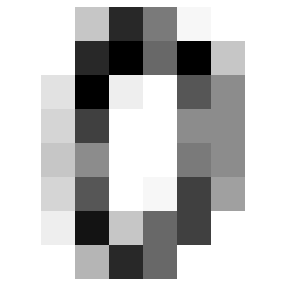

In [32]:
plot_image(digits.images[0])

`A colored image is typically composed of multiple colors and almost all colors can be generated from three primary colors – red, green and blue. Hence, in the case of a colored image, there are three Matrices (or channels). Each matrix has values between 0-255 representing the intensity of the color for that pixel.`

#### Grayscale Feature Extraction

`The simplest way to create features from an image is to use these raw pixel values as separate features. The classic MNIST example is comprised of 28x28 images, with each pixel having a value between 0 and 255. To convert this image to an ML friendly format the image is reshaped.`

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 



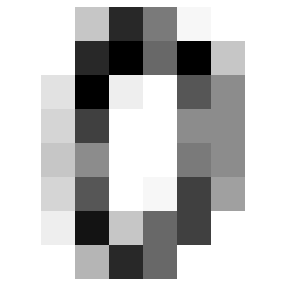

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]] 



In [33]:
zero_matrix = digits.images[0]
print(zero_matrix, "\n")
# The image in the matrix form
plot_image(zero_matrix)

# We reshape the matrix so that it is a vector, this makes little sense to us
# as humans however it is much more interpretable for an ML algorith
zero_vector = zero_matrix.reshape(1, -1)
print(zero_vector, "\n")

plot_image(zero_vector)

#### Mean Pixel Value Feature Extraction

`The previous image was in grayscale, there was no colour. As mentioned earlier the difference between a colour and non-colour image in storage is that colour images have 3 channels (RGB). A valid method of feature extraction for colour images is to take the average value of each pixel, the average value for that location in the matrix across each of the 3 channels.`

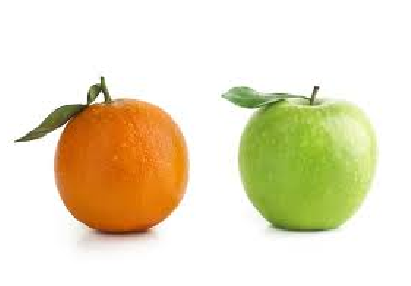

In [5]:
from skimage.io import imread, imshow

image = imread("applesandoranges.jpg")
plot_image(image)

In [6]:
feature_matrix = np.zeros((image.shape[0], image.shape[1]))

for i in range(0, image.shape[0]):
    for j in range(0, image.shape[1]):
        feature_matrix[i][j] = ((int(image[i, j, 0]) + int(image[i, j, 1])
                                 + int(image[i, j, 2]))/3)

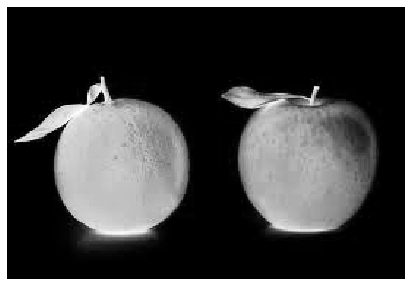

In [7]:
plot_image(feature_matrix)

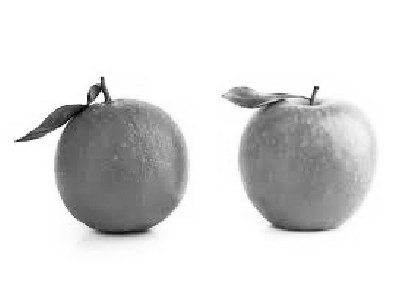

In [8]:
feature_matrix_inverted = np.invert(feature_matrix.astype(np.int))
plot_image(feature_matrix_inverted)

#### Extracting Edge Features

`Edge detection is a technique used in computer vision to find the boundaries of an image in a photograph. This uses an algorithm that searches for discontinuities in pixel brightness in an image that is converted to grayscale.`

`There are functions included in a variety of packages that mean we do not have to write any horrendous loops, one example is the ImageFilter module from PIL which can also both blur and sharpen the image.`

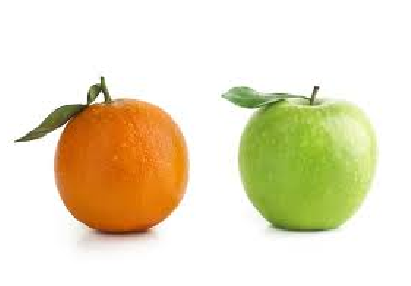

In [9]:
from PIL import Image
# load an image
img = Image.open("applesandoranges.jpg")
# the image before any enhancement
plot_image(img)

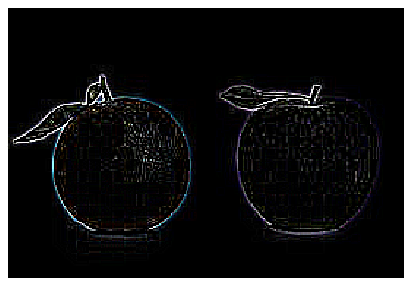

In [10]:
from PIL import ImageFilter

# The ImageFilter module contains definitions for a pre-defined set of filters,
# which can be be used with the Image.filter() method
# https://pillow.readthedocs.io/en/5.1.x/reference/ImageFilter.html
edges = img.filter(ImageFilter.FIND_EDGES)
edges.save("aao_edges.jpg")
plot_image(edges)

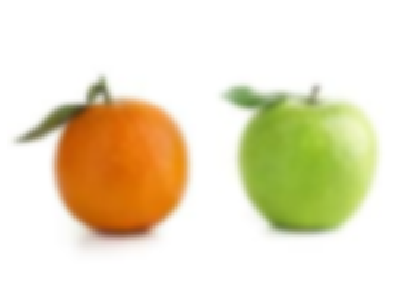

In [11]:
blur = img.filter(ImageFilter.GaussianBlur(radius=2))
blur.save("aao_blur.jpg")
plot_image(blur)

# Feature Generation

### What is feature generation

`Feature generation is a term often substituted for both feature engineering and selection and there does not seem to be an official consensus on how the three are distinct. In the following section we will be going witht the following definition for feature generation:`

`Feature generation is the process of creating new features from one or multiple existing features, potentially for using in statistical analysis. Hopefully more data leads to a better model although that is not always the case, there is no point in generating low quality features/data.`

`We will now go through a couple of classic pieces of feature generation that are probably the most practical/commonly used.`

### Common examples of feature generation

#### Dimensionality reduction

`Dimensionality reduction can be thought of as a method of feature generation. Please see Michael's notebook for everything you could ever want to know about it.`

#### Interactions

`One of the easiest ways to create new features is by combining categorical variables. For example, if one record has the cylinders "8" and model-year "70", you can create a new value "cylinders_model-year". This is a new categorical feature that can provide information about correlations between categorical variables. This type of feature is typically called an interaction.`

`In general, you would build interaction features from all pairs of categorical features. You can make interactions from three or more features as well, but you'll tend to get diminishing returns.`

In [41]:
df = pd.DataFrame(pd.read_csv("auto-mpg.csv"))
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  model-year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70

In [42]:
# Pandas lets us simply add string columns together like normal Python strings.
interactions = df["cylinders"].apply(str) + "_" + df["model-year"].apply(str)
df["interaction_1"] = pd.Series(interactions)
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model-year interaction_1  
0          70          8_70  
1          70          8_70  
2          70          8_70  
3          70          8_70  
4          70          8_70

#### Rolling time windows

In [43]:
from random import gauss

times = pd.date_range('2020-12-01', periods=100, freq='D')
data = pd.Series([gauss(0, 10) for x in range(len(times))])
d = {'Date': times, 'Value': data}
df = pd.DataFrame(d)

df.head()

Date      Value
0 2020-12-01 -13.903882
1 2020-12-02 -13.440389
2 2020-12-03   0.858408
3 2020-12-04  -1.416749
4 2020-12-05  -7.874409

In [44]:
df['Rolling Mean (5)'] = df['Value'].rolling(window=5).mean()
df.head(10)

Date      Value  Rolling Mean (5)
0 2020-12-01 -13.903882               NaN
1 2020-12-02 -13.440389               NaN
2 2020-12-03   0.858408               NaN
3 2020-12-04  -1.416749               NaN
4 2020-12-05  -7.874409         -7.155404
5 2020-12-06 -17.171909         -7.809010
6 2020-12-07  10.387459         -3.043440
7 2020-12-08  10.361130         -1.142896
8 2020-12-09  -3.281108         -1.515767
9 2020-12-10 -10.222751         -1.985436

In [45]:
df['Rolling Mean (3)'] = df['Value'].rolling(window=3).mean()
df['Rolling Median (5)'] = df['Value'].rolling(window=5).median()
df['Rolling Median (3)'] = df['Value'].rolling(window=3).median()

df.head(10)

Date      Value  Rolling Mean (5)  Rolling Mean (3)  \
0 2020-12-01 -13.903882               NaN               NaN   
1 2020-12-02 -13.440389               NaN               NaN   
2 2020-12-03   0.858408               NaN         -8.828621   
3 2020-12-04  -1.416749               NaN         -4.666244   
4 2020-12-05  -7.874409         -7.155404         -2.810917   
5 2020-12-06 -17.171909         -7.809010         -8.821023   
6 2020-12-07  10.387459         -3.043440         -4.886286   
7 2020-12-08  10.361130         -1.142896          1.192227   
8 2020-12-09  -3.281108         -1.515767          5.822494   
9 2020-12-10 -10.222751         -1.985436         -1.047576   

   Rolling Median (5)  Rolling Median (3)  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN          -13.440389  
3                 NaN           -1.416749  
4           -7.874409           -1.416749  
5           -7.874409           -7.874409  
6           -1.416749           -7.874409  
7           -1.416749           10.361130  
8           -3.281108           10.361130  
9           -3.281108           -3.281108

# Feature Selection

`Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.`

`The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.`

## [Removing low variance features](https://scikit-learn.org/stable/modules/feature_selection.html#removing-features-with-low-variance) 

`VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.`

## Univariate feature selection

`Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.`

* `SelectKBest removes all but the  highest scoring features`

* `SelectPercentile removes all but a user-specified highest scoring percentage of features`

* `And others.`

`Here is an example of using a chi squared test to retrieve the 2 best features from the iris dataset.`

In [46]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [47]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

`Warning: Beware not to use a regression scoring function with a classification problem, you will get useless results.`

* `For classification: chi2, f_classif, mutual_info_classif`

* `For regression: f_regression, mutual_info_regression`

`For classification, the measure of impurity is either the Gini impurity or the information gain/entropy.`

`For regression the measure of impurity is variance.`

## SelectFromModel



### [Tree-based feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#tree-based-feature-selection)

`Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to compute feature importances, which in turn can be used to discard irrelevant features (when coupled with the sklearn.feature_selection.SelectFromModel meta-transformer)`

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

In [49]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [50]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


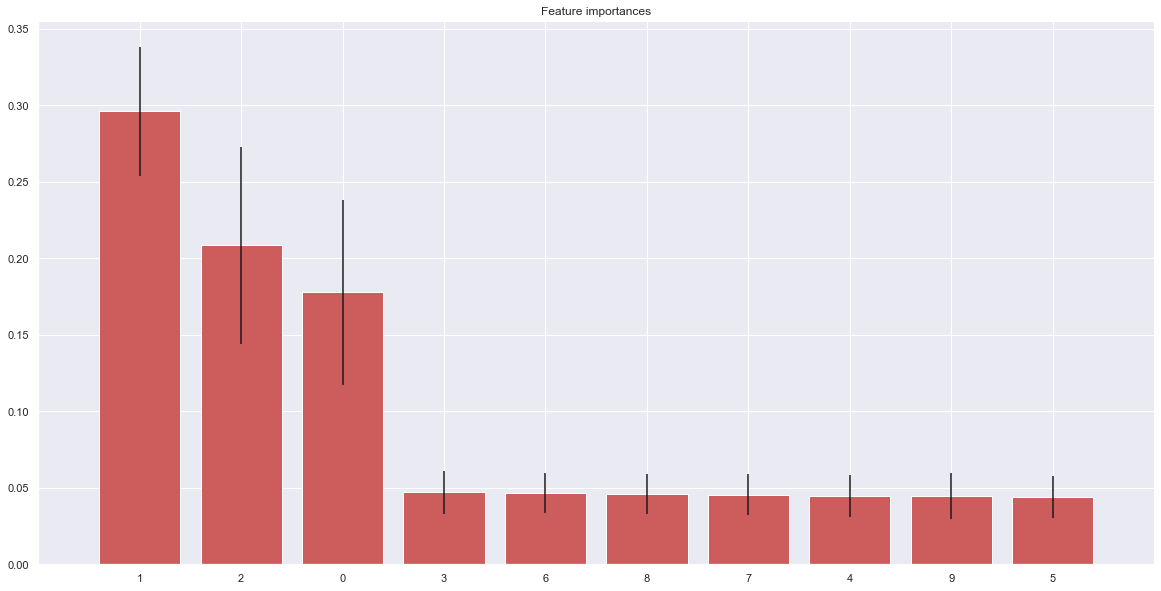

In [51]:
# Plot the feature importances of the forest
plt.figure(figsize=(20, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="indianred", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [52]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(forest, prefit=True)
X_new = model.transform(X)
X_new.shape  

(1000, 3)

###  [L1-based feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#l1-based-feature-selection)

`Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with feature_selection.SelectFromModel to select the non-zero coefficients.`

In [53]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [54]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter=10000).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)

# Automation of Feature Engineering - FeatureTools

`FeatureTools allows you to setup Entities and relationships in your data and can then automatically generate tens to hundreds of new features for you.`

`FeatureTools relies on Deep Feature Synthesis to generate features, using a combination of Tandsormations and Aggregations to generate features.`


* [`Deep Feature Synthesis`](https://blog.featurelabs.com/deep-feature-synthesis/)

* [`FeatureTools Docs`](https://docs.featuretools.com/en/stable/)

* [`Featuretools Demos`](https://www.featuretools.com/demos/)

## FeatureTools Demo

In [55]:
import featuretools as ft

data = ft.demo.load_mock_customer()

In [56]:
customers_df = data["customers"]
print(len(customers_df))
customers_df.head()

5


customer_id zip_code           join_date date_of_birth
0            1    60091 2011-04-17 10:48:33    1994-07-18
1            2    13244 2012-04-15 23:31:04    1986-08-18
2            3    13244 2011-08-13 15:42:34    2003-11-21
3            4    60091 2011-04-08 20:08:14    2006-08-15
4            5    60091 2010-07-17 05:27:50    1984-07-28

In [57]:
sessions_df = data["sessions"]
print(len(sessions_df))
sessions_df.head()

35


session_id  customer_id   device       session_start
0           1            2  desktop 2014-01-01 00:00:00
1           2            5   mobile 2014-01-01 00:17:20
2           3            4   mobile 2014-01-01 00:28:10
3           4            1   mobile 2014-01-01 00:44:25
4           5            4   mobile 2014-01-01 01:11:30

In [58]:
transactions_df = data["transactions"]
print(len(transactions_df))
transactions_df.head()

500


transaction_id  session_id    transaction_time product_id  amount
0             298           1 2014-01-01 00:00:00          5  127.64
1               2           1 2014-01-01 00:01:05          2  109.48
2             308           1 2014-01-01 00:02:10          3   95.06
3             116           1 2014-01-01 00:03:15          4   78.92
4             371           1 2014-01-01 00:04:20          3   31.54

In [59]:
entities = {
  "customers" : (customers_df, "customer_id"),
  "sessions" : (sessions_df, "session_id", "session_start"),
  "transactions" : (transactions_df, "transaction_id", "transaction_time")
}

In [60]:
#(parent_entity, parent_variable, child_entity, child_variable)

relationships = [("sessions", "session_id", "transactions", "session_id"),
                 ("customers", "customer_id", "sessions", "customer_id")]
 

In [61]:
feature_matrix_customers, features_defs = ft.dfs(entities=entities,
                                                 relationships=relationships,
                                                 target_entity="customers")

In [62]:
feature_matrix_customers

zip_code  COUNT(sessions)  NUM_UNIQUE(sessions.device)  \
customer_id                                                          
1              60091                8                            3   
2              13244                7                            3   
3              13244                6                            3   
4              60091                8                            3   
5              60091                6                            3   

            MODE(sessions.device)  SUM(transactions.amount)  \
customer_id                                                   
1                          mobile                   9025.62   
2                         desktop                   7200.28   
3                         desktop                   6236.62   
4                          mobile                   8727.68   
5                          mobile                   6349.66   

             STD(transactions.amount)  MAX(transactions.amount)  \
customer_id                                                       
1                           40.442059                    139.43   
2                           37.705178                    146.81   
3                           43.683296                    149.15   
4                           45.068765                    149.95   
5                           44.095630                    149.02   

             SKEW(transactions.amount)  MIN(transactions.amount)  \
customer_id                                                        
1                             0.019698                      5.81   
2                             0.098259                      8.73   
3                             0.418230                      5.89   
4                            -0.036348                      5.73   
5                            -0.025941                      7.55   

             MEAN(transactions.amount)  ...  \
customer_id                             ...   
1                            71.631905  ...   
2                            77.422366  ...   
3                            67.060430  ...   
4                            80.070459  ...   
5                            80.375443  ...   

             NUM_UNIQUE(sessions.DAY(session_start))  \
customer_id                                            
1                                                  1   
2                                                  1   
3                                                  1   
4                                                  1   
5                                                  1   

             MODE(sessions.YEAR(session_start))  \
customer_id                                       
1                                          2014   
2                                          2014   
3                                          2014   
4                                          2014   
5                                          2014   

             MODE(sessions.WEEKDAY(session_start))  \
customer_id                                          
1                                                2   
2                                                2   
3                                                2   
4                                                2   
5                                                2   

             MODE(sessions.MODE(transactions.product_id))  \
customer_id                                                 
1                                                       4   
2                                                       3   
3                                                       1   
4                                                       1   
5                                                       3   

             MODE(sessions.MONTH(session_start))  \
customer_id                                        
1                                              1   
2                                              1   
3                                   

In [63]:
print(features_defs)

[<Feature: zip_code>, <Feature: COUNT(sessions)>, <Feature: NUM_UNIQUE(sessions.device)>, <Feature: MODE(sessions.device)>, <Feature: SUM(transactions.amount)>, <Feature: STD(transactions.amount)>, <Feature: MAX(transactions.amount)>, <Feature: SKEW(transactions.amount)>, <Feature: MIN(transactions.amount)>, <Feature: MEAN(transactions.amount)>, <Feature: COUNT(transactions)>, <Feature: NUM_UNIQUE(transactions.product_id)>, <Feature: MODE(transactions.product_id)>, <Feature: DAY(date_of_birth)>, <Feature: DAY(join_date)>, <Feature: YEAR(date_of_birth)>, <Feature: YEAR(join_date)>, <Feature: MONTH(date_of_birth)>, <Feature: MONTH(join_date)>, <Feature: WEEKDAY(date_of_birth)>, <Feature: WEEKDAY(join_date)>, <Feature: SUM(sessions.MEAN(transactions.amount))>, <Feature: SUM(sessions.MAX(transactions.amount))>, <Feature: SUM(sessions.NUM_UNIQUE(transactions.product_id))>, <Feature: SUM(sessions.MIN(transactions.amount))>, <Feature: SUM(sessions.STD(transactions.amount))>, <Feature: SUM(ses

In [64]:
feature_matrix_sessions, features_defs = ft.dfs(entities=entities,
                                                 relationships=relationships,
                                                 target_entity="sessions")
feature_matrix_sessions

customer_id   device  SUM(transactions.amount)  \
session_id                                                   
1                     2  desktop                   1229.01   
2                     5   mobile                    746.96   
3                     4   mobile                   1329.00   
4                     1   mobile                   1613.93   
5                     4   mobile                    777.02   
6                     1   tablet                   1266.60   
7                     3   tablet                    941.87   
8                     4   tablet                   1351.46   
9                     1  desktop                   1052.03   
10                    2   tablet                   1320.64   
11                    4   mobile                   1155.82   
12                    4  desktop                    771.68   
13                    4   mobile                    947.56   
14                    1   tablet                   1025.63   
15                    2  desktop                    634.84   
16                    2  desktop                    965.81   
17                    2   tablet                   1004.96   
18                    1  desktop                    943.28   
19                    3  desktop                    944.85   
20                    5  desktop                   1000.00   
21                    4  desktop                   1290.64   
22                    4  desktop                   1104.50   
23                    3  desktop                    889.21   
24                    5   tablet                   1137.72   
25                    3  desktop                   1022.05   
26                    1   tablet                    809.97   
27                    1   mobile                    894.09   
28                    5   mobile                   1700.67   
29                    1   mobile                   1420.09   
30                    5  desktop                   1221.13   
31                    2   mobile                   1240.19   
32                    5   mobile                    543.18   
33                    2   mobile                    804.83   
34                    3  desktop                   1477.97   
35                    3   mobile                    960.67   

            STD(transactions.amount)  MAX(transactions.amount)  \
session_id                                                       
1                          41.600976                    141.66   
2                          45.893591                    135.25   
3                          46.240016                    147.73   
4                          40.187205                    129.00   
5                          48.918663                    139.20   
6                          42.654755                    139.23   
7                          47.264797                    146.31   
8                          44.213242                    143.85   
9                          46.905665                    132.72   
10                         39.886614                    142.44   
11                         35.466284                    147.86   
12                         50.281655                    143.96   
13                         54.293903                    142.28   
14                         39.825249                    139.09   
15                         47.935920                    146.81   
16                         27.839228                    138.38   
17                         33.725036                    118.85   
18                         36.044179                    133.49   
19                         36.167220                    126.74   
20                         37.886094                    135.99   
21                         47.685642                    149.95   
22                         29.026424                    143.16   
23                         35.704680                    128.26   
24                         51.149250                    146.46   
2